In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 


from sklearn import decomposition


Recent trends show that the yield of your company’s flagship product is declining. You are uncertain if the supplier of a key raw material is to blame, or if it is due to a change in your process conditions. You begin by investigating the raw material supplier.

The data available has:

N=24

K=6 + 1 designation of process outcome

Web address: https://openmv.net/info/raw-material-characterization

Description: 3 of the 6 measurements are size values for the plastic pellets, while the other 3 are the outputs from thermogravimetric analysis (TGA), differential scanning calorimetry (DSC) and thermomechanical analysis (TMA), measured in a laboratory. These 6 measurements are thought to adequately characterize the raw material. Also provided is a designation Adequate or Poor that reflects the process engineer’s opinion of the yield from that lot of materials.

In [2]:
data = pd.read_csv("raw-material-characterization.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

Lot number   Outcome  Size5  Size10  Size15    TGA   DSC   TMA
0       B370  Adequate   13.8     9.2    41.2  787.3  18.0  65.0
1       B880  Adequate   11.2     5.8    27.6  772.2  17.7  68.8
2       B452  Adequate    9.9     5.8    28.3  602.3  18.3  50.7
3       B287  Adequate   10.4     4.0    24.7  677.9  17.7  56.5
4       B576  Adequate   12.3     9.3    22.0  593.5  19.5  52.0

In [3]:
df = data.drop(['Lot number', 'Outcome'], axis=1)
df_normal=(df-df.mean())/df.std()
df.head()

Size5  Size10  Size15    TGA   DSC   TMA
0   13.8     9.2    41.2  787.3  18.0  65.0
1   11.2     5.8    27.6  772.2  17.7  68.8
2    9.9     5.8    28.3  602.3  18.3  50.7
3   10.4     4.0    24.7  677.9  17.7  56.5
4   12.3     9.3    22.0  593.5  19.5  52.0

In [4]:
X = df_normal.to_numpy()
Y = data.to_numpy()[:,1]
for i,y in enumerate(Y):
    if y=="Adequate":
        Y[i]=1
    else:
        Y[i]=0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F7F671550>,
      dtype=object)

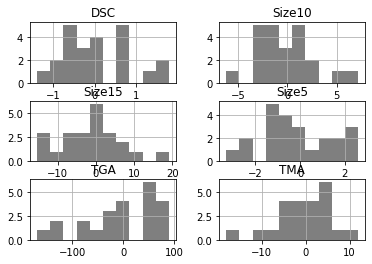

In [5]:
df.diff().hist(color='k', alpha=0.5, bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F0AEDF0B8>,
      dtype=object)

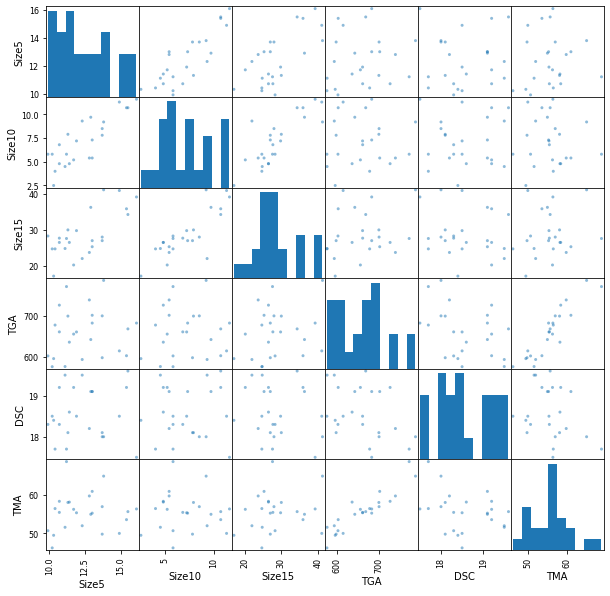

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.5, figsize=(10, 10))

In [27]:
pca = decomposition.PCA(n_components=6)
pca.fit(X)
Z = pca.transform(X)

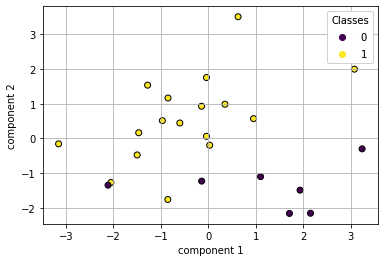

In [28]:
# Plot the training points

fig, ax = plt.subplots()

scatter = ax.scatter(Z[:, 0], Z[:, 1], c=Y,
            edgecolor='k', label=Y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid(True)

legend1 = ax.legend(*scatter.legend_elements(),
                    title="Classes")
ax.add_artist(legend1)

In [29]:
pca.explained_variance_

array([2.66898032, 2.03757655, 0.83986583, 0.27410699, 0.10330485,
       0.07616546])

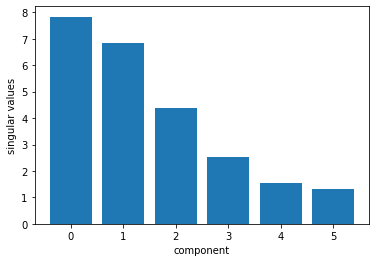

In [34]:
fig, ax = plt.subplots()
ncomp = [i for i in range(6)]
plt.bar(ncomp,pca.singular_values_)
plt.ylabel('singular values')
plt.xlabel('component')
plt.show()

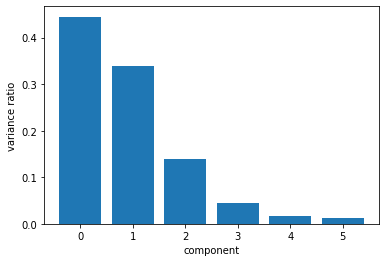

In [35]:
fig, ax = plt.subplots()
ncomp = [i for i in range(6)]
plt.bar(ncomp,pca.explained_variance_ratio_)
plt.ylabel('variance ratio')
plt.xlabel('component')
plt.show()